In [7]:
import pandas as pd
import sys
import numpy as np

sys.path.append("../../")
# get repo root actual dir (for file reading)
from helpers.system_helpers.repo_root import REPO_ROOT
from helpers.data_helpers.elexon_api_helpers import call_physbm_api, fetch_physical_data
from pyproj import Transformer
from helpers.constants import DATA_DIR

config = {
    "start_date": "01/01/2024",
    "end_date": "01/09/2025",
    "repd_name": "doronell",
    "elexon_id": ["T_DOREW-1", "T_DOREW-2"],
}

start_date = config["start_date"]
end_date = config["end_date"]
repd_name = config["repd_name"]
elexon_id = config["elexon_id"]

met_ss_api = "eyJ4NXQjUzI1NiI6Ik5XVTVZakUxTkRjeVl6a3hZbUl4TkdSaFpqSmpOV1l6T1dGaE9XWXpNMk0yTWpRek5USm1OVEE0TXpOaU9EaG1NVFJqWVdNellXUm1ZalUyTTJJeVpBPT0iLCJraWQiOiJnYXRld2F5X2NlcnRpZmljYXRlX2FsaWFzIiwidHlwIjoiSldUIiwiYWxnIjoiUlMyNTYifQ==.eyJzdWIiOiJGYXJxdWhhcnNvbmFyQGdtYWlsLmNvbUBjYXJib24uc3VwZXIiLCJhcHBsaWNhdGlvbiI6eyJvd25lciI6IkZhcnF1aGFyc29uYXJAZ21haWwuY29tIiwidGllclF1b3RhVHlwZSI6bnVsbCwidGllciI6IlVubGltaXRlZCIsIm5hbWUiOiJzaXRlX3NwZWNpZmljLTkwMDEzZmUxLWQ1YmUtNDFjOC04YWJiLTQ1Zjc2ZjI1MTdkZCIsImlkIjoyNTQ2MywidXVpZCI6ImRhMjBhMWNiLWVhOTItNDEzNS1hOGI0LTJkMDYxNDNjYzQwYSJ9LCJpc3MiOiJodHRwczpcL1wvYXBpLW1hbmFnZXIuYXBpLW1hbmFnZW1lbnQubWV0b2ZmaWNlLmNsb3VkOjQ0M1wvb2F1dGgyXC90b2tlbiIsInRpZXJJbmZvIjp7IndkaF9zaXRlX3NwZWNpZmljX2ZyZWUiOnsidGllclF1b3RhVHlwZSI6InJlcXVlc3RDb3VudCIsImdyYXBoUUxNYXhDb21wbGV4aXR5IjowLCJncmFwaFFMTWF4RGVwdGgiOjAsInN0b3BPblF1b3RhUmVhY2giOnRydWUsInNwaWtlQXJyZXN0TGltaXQiOjAsInNwaWtlQXJyZXN0VW5pdCI6InNlYyJ9fSwia2V5dHlwZSI6IlBST0RVQ1RJT04iLCJzdWJzY3JpYmVkQVBJcyI6W3sic3Vic2NyaWJlclRlbmFudERvbWFpbiI6ImNhcmJvbi5zdXBlciIsIm5hbWUiOiJTaXRlU3BlY2lmaWNGb3JlY2FzdCIsImNvbnRleHQiOiJcL3NpdGVzcGVjaWZpY1wvdjAiLCJwdWJsaXNoZXIiOiJKYWd1YXJfQ0kiLCJ2ZXJzaW9uIjoidjAiLCJzdWJzY3JpcHRpb25UaWVyIjoid2RoX3NpdGVfc3BlY2lmaWNfZnJlZSJ9XSwidG9rZW5fdHlwZSI6ImFwaUtleSIsImlhdCI6MTc1ODEyMDY3MywianRpIjoiNDIzMWE4N2QtNDhhNC00ZDAxLTg3YjctMmY5MWYwOTkwNTBiIn0=.PuBtkHdKKohOO9P2NuiS0r9KMAfnosx1w8kY1SvPZnS0-t_iA290CwlBOvI1L8dwl51jftt2k8pF6lqDQveFl4yQ2b_SZ9zjBy1nshSppnHO1HBZSgFgneat03-ueOettyZc5VQB425Zj0zqi7e01VAFaGMu8pmVYAJDKNFipg-lrgmXumgyOe1OtrLjc6JzPfNKk0hjDB4WUy_ds1XJ79YeucrQuyR507fTc8HF5wxMe5do7na26fboic3E5XdePNDPj_-i1vle-7nqCXwEn58OE75b2EwPDAtAhw5ntdxuzexXVeATOgjhpbCbsp3kDXWIWdLoUXidwiAxy7LW6g=="

In [ ]:
start_date = "01/01/2024"
end_date = "01/04/2024"

datetimes = pd.date_range(
    pd.to_datetime(start_date, format="%d/%m/%Y"),
    pd.to_datetime(end_date, format="%d/%m/%Y"),
    freq="30min",
)
datetimes

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 00:30:00',
               '2024-01-01 01:00:00', '2024-01-01 01:30:00',
               '2024-01-01 02:00:00', '2024-01-01 02:30:00',
               '2024-01-01 03:00:00', '2024-01-01 03:30:00',
               '2024-01-01 04:00:00', '2024-01-01 04:30:00',
               ...
               '2024-03-31 19:30:00', '2024-03-31 20:00:00',
               '2024-03-31 20:30:00', '2024-03-31 21:00:00',
               '2024-03-31 21:30:00', '2024-03-31 22:00:00',
               '2024-03-31 22:30:00', '2024-03-31 23:00:00',
               '2024-03-31 23:30:00', '2024-04-01 00:00:00'],
              dtype='datetime64[ns]', length=4369, freq='30min')

In [ ]:
# wind farm of choice given that there are two but they are in the same location
# Dorenell Wind Farm
# 1. get locational data for Dorenell Wind Farm
df_loc = pd.read_csv(f"{REPO_ROOT}/data/doronell_data/{repd_name}_repd.csv")
df_loc[["Site Name", "Address", "Country", "Post Code", "X-coordinate", "Y-coordinate"]]

display(
    df_loc[
        ["Site Name", "Address", "Country", "Post Code", "X-coordinate", "Y-coordinate"]
    ]
)
# Transformer from OSGB36 / British National Grid → WGS84 standard GPS
transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326", always_xy=True)
x, y = df_loc["X-coordinate"].iloc[0], df_loc["X-coordinate"].iloc[0]
lon, lat = transformer.transform(x, y)
print(lon, lat)


,Site Name,Address,Country,Post Code,X-coordinate,Y-coordinate
0,Dorenell Wind Farm (Previously Site A and B Sc...,"Glenlivet Estate, Dufftown, Speyside, Moray",Scotland,NaN,332000,829500


-3.011912044445406 52.8811455063142


In [10]:
# 57.321369, -3.169764 to 57.3764676, -3.106179
# 57° 19' 16.928''	W 3° 10' 11.15'' to 57° 19' 16.928''	W 3° 10' 11.15''
# 57°22 -3°6 to 57°19 -3°10

# THIS IS WHAT WE ARE USING AS WF MIDPOINT:
# 57°20'00.0"N 3°08'00.0"W
# 57.333333, -3.133333
lon = 57.333333
lat = -3.133333

In [ ]:
# get elexon data
start_date = "01/01/2024"
end_date = "04/01/2024"
data_df = fetch_physical_data(
    start_date,
    end_date,
    save_dir=DATA_DIR / "doronell_data/pn_db/",
    cache=True,
    unit_ids=["T_DOREW-1", "T_DOREW-2"],
    multiprocess=True,
    pull_data_once=False,
)

INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-1
INFO:helpers.data_helpers.elexon_api_helpers:Calling BOAS API for T_DOREW-2
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00
INFO:helpers.data_helpers.elexon_api_helpers:Getting PN from 2024-01-01 00:00:00


KeyError: 'data'

In [14]:
# 3. get weather data of doronell
from helpers.data_helpers.metoffice_api_helpers import met_office_forecast_api

# attempt 1 metoffice - only gets current and next few days data
requestHeaders = {"apikey": met_ss_api}
headers = {"accept": "application/json"}
headers.update(requestHeaders)
base_url = "https://data.hub.api.metoffice.gov.uk/sitespecific/v0/point/"
timesteps = "three-hourly"
latitude = lat
longitude = lon
req = met_office_forecast_api(
    baseUrl=base_url,
    timesteps=timesteps,
    requestHeaders=requestHeaders,
    latitude=latitude,
    longitude=longitude,
    excludeMetadata=False,
    includeLocation=True,
)
df_forecast = pd.DataFrame(req.json()["features"][0]["properties"]["timeSeries"])
df_forecast[
    [
        "time",
        "windSpeed10m",
        "windDirectionFrom10m",
        "windGustSpeed10m",
        "max10mWindGust",
    ]
].head()
df_forecast.columns

{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[55.5214,-4.674,3.0]},"properties":{"location":{"name":"Seychelles International"},"requestPointDistance":264178.9417,"modelRunDate":"2025-10-01T17:00Z","timeSeries":[{"time":"2025-10-01T15:00Z","maxScreenAirTemp":28.5,"minScreenAirTemp":26.52,"max10mWindGust":8.2,"significantWeatherCode":2,"totalPrecipAmount":0.0,"totalSnowAmount":0,"windSpeed10m":6.2,"windDirectionFrom10m":130,"windGustSpeed10m":8.2,"visibility":24064,"mslp":100960,"screenRelativeHumidity":81.14,"feelsLikeTemp":26.75,"uvIndex":0,"probOfPrecipitation":4,"probOfSnow":0,"probOfHeavySnow":0,"probOfRain":4,"probOfHeavyRain":2,"probOfHail":0,"probOfSferics":0},{"time":"2025-10-01T18:00Z","maxScreenAirTemp":26.6,"minScreenAirTemp":26.0,"max10mWindGust":8.57,"significantWeatherCode":0,"totalPrecipAmount":0.0,"totalSnowAmount":0,"windSpeed10m":4.58,"windDirectionFrom10m":126,"windGustSpeed10m":6.75,"visibility":20234,"mslp":1011

Index(['time', 'maxScreenAirTemp', 'minScreenAirTemp', 'max10mWindGust',
       'significantWeatherCode', 'totalPrecipAmount', 'totalSnowAmount',
       'windSpeed10m', 'windDirectionFrom10m', 'windGustSpeed10m',
       'visibility', 'mslp', 'screenRelativeHumidity', 'feelsLikeTemp',
       'uvIndex', 'probOfPrecipitation', 'probOfSnow', 'probOfHeavySnow',
       'probOfRain', 'probOfHeavyRain', 'probOfHail', 'probOfSferics'],
      dtype='object')

In [ ]:
# try hasgrid data - historic but only get yearly or seasonal average
import xarray as xr

# Open the file
hasgrid_xr = xr.open_dataset(
    f"{REPO_ROOT}/data/sfcWind_hadukgrid_uk_1km_ann_202301-202312.nc"
)
print(list(hasgrid_xr.variables))

['sfcWind', 'transverse_mercator', 'time_bnds', 'projection_y_coordinate_bnds', 'projection_x_coordinate_bnds', 'time', 'projection_y_coordinate', 'projection_x_coordinate', 'latitude', 'longitude']


In [ ]:
df_hasgrid_wind = hasgrid_xr["sfcWind"]
df_hasgrid_wind = df_hasgrid_wind.to_dataframe().reset_index()

In [ ]:
df_hasgrid_wind[(np.round(df_hasgrid_wind["longitude"], 3) == -3.012)]

,time,projection_y_coordinate,projection_x_coordinate,latitude,longitude,sfcWind
55425,2023-07-01,-138500.0,325500.0,48.649187,-3.011578,NaN
56325,2023-07-01,-137500.0,325500.0,48.658182,-3.011758,NaN
57225,2023-07-01,-136500.0,325500.0,48.667178,-3.011938,NaN
58125,2023-07-01,-135500.0,325500.0,48.676173,-3.012118,NaN
59025,2023-07-01,-134500.0,325500.0,48.685169,-3.012298,NaN
...,...,...,...,...,...,...
1189443,2023-07-01,1121500.0,343500.0,59.975041,-3.012313,NaN
1246144,2023-07-01,1184500.0,344500.0,60.540814,-3.011703,NaN
1247044,2023-07-01,1185500.0,344500.0,60.549792,-3.011984,NaN
1247944,2023-07-01,1186500.0,344500.0,60.558770,-3.012264,NaN


In [ ]:
# open weather data - not allowed either witout paying
import requests

lat = 3.01
lon = 52.88
start = 1369728000
end = 1369729000
open_weather_data_api_key = "1548fbeeba9526658fd7bf8ba300189b"

open_weather_api_url = f"https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid={open_weather_data_api_key}"
df = requests.get(open_weather_api_url)

In [ ]:
# ECMWF data
import xarray as xr

# Open GRIB file
ds = xr.open_dataset(
    f"{REPO_ROOT}/data/doronell_data/doronell_ecmwf.grib", engine="cfgrib"
)

ERROR:cfgrib.dataset:skipping variable: paramId==49 shortName='fg10'
Traceback (most recent call last):
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1704067200, 1704070800, 1704074400, ..., 1757836800, 1757840400,
       1757844000], shape=(14939,))) new_value=Variable(dimensions=('time',), data=array([1704045600, 1704088800, 1704132000, ..., 1757743200, 1757786400,
       1757829600], shape=(1246,)))
c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version

In [ ]:
df_v100 = ds["v100"].to_dataframe().reset_index()
df_u100 = ds["u100"].to_dataframe().reset_index()

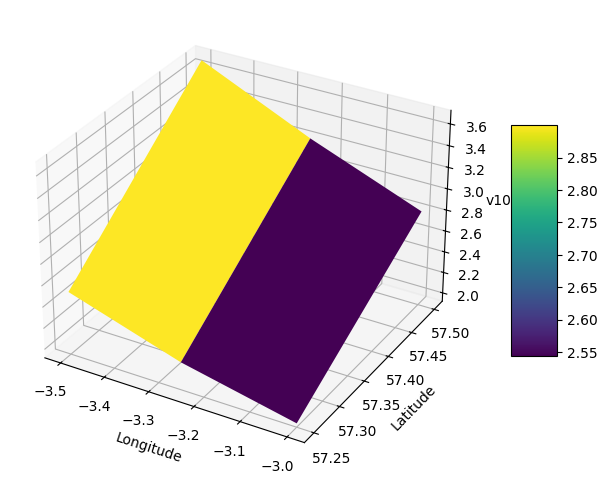

In [ ]:
import matplotlib.pyplot as plt

df = df_v100[:6][["latitude", "longitude", "v100"]].copy()

pivot = df.pivot(index="latitude", columns="longitude", values="v100")
X, Y = np.meshgrid(pivot.columns, pivot.index)
Z = pivot.values

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap="viridis")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("v100")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
def linear_approximation(df, col):

    windfarm_lat = 57.33
    windfarm_long = -3.13
    lat1 = np.ceil(windfarm_lat / 0.25) * 0.25
    lat2 = np.floor(windfarm_lat / 0.25) * 0.25
    long1 = np.ceil(windfarm_long / 0.25) * 0.25
    long2 = np.floor(windfarm_long / 0.25) * 0.25

    assert np.abs(lat2 - lat1) == np.abs(long1 - long2) == 0.25, print(
        np.abs(lat2 - lat1), np.abs(long1 - long2)
    )
    # choose the four values the box within which is our wind farm
    df = df[
        (df["latitude"].isin([lat1, lat2])) & (df["longitude"].isin([long1, long2]))
    ]
    # sort by lat and long so we ensure that we take the diff of the smallest to biggest
    df = df[["time", "latitude", "longitude", col]].sort_values(
        ["time", "latitude", "longitude"]
    )

    # get the gradients of change in wind speed by change in coord withing the quadrant
    df = df.join(
        df.groupby(["time", "latitude"])[[col]].diff().rename(columns={col: "mlong"})
        / -0.25
    )
    df = df.join(
        df.groupby(["time", "longitude"])[[col]].diff().rename(columns={col: "mlat"})
        / -0.25
    )
    # and align those to the row where both at ad long has changed (the patial derivatives, ( we have assumed dy/dx and dy/dz are independent here)
    df = df.drop(["mlong", "mlat"], axis=1).join(
        df.groupby("time")[["mlong", "mlat"]].transform(
            lambda x: x.dropna().iloc[0] if x.notna().any() else pd.NA
        )
    )

    # get the wind speed in the moiddle of the quadrant going from each of the two sides and take the average
    df["latitude_wf"] = windfarm_lat
    df["longitude_wf"] = windfarm_long
    df["latitude_wf_diff"] = df["latitude_wf"] - df["latitude"]
    df["longitude_wf_diff"] = df["longitude_wf"] - df["longitude"]
    df[f"{col}_wf"] = (
        df[col]
        + df["mlong"] * df["longitude_wf_diff"]
        + df["mlat"] * df["latitude_wf_diff"]
    )
    df = df.join(
        df.groupby(["time"])[[f"{col}_wf"]]
        .transform(lambda x: (x.iloc[0] + x.iloc[3]) / 2)
        .rename(columns={f"{col}_wf": f"{col}_wf_avg"})
    )
    # just keep the info we need now
    df = (
        df[["time", f"{col}_wf_avg"]]
        .rename(columns={f"{col}_wf_avg": col})
        .drop_duplicates()
    )

    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = pd.to_numeric(df[col], errors="coerce")
    return df


def get_wind_angle(df_gcmwf):
    df_gcmwf["angle"] = (
        np.arctan(np.abs(df_gcmwf["v100"]) / np.abs(df_gcmwf["u100"])) * 180 / np.pi
    )
    # df_gcmwf['angle'] = np.arcsin(df_gcmwf['v100']/df_gcmwf['u100'])*180/np.pi
    df_gcmwf["angle"] = np.where(
        (df_gcmwf["v100"] > 0) & (df_gcmwf["u100"] > 0),
        df_gcmwf["angle"],
        np.where(
            (df_gcmwf["v100"] < 0) & (df_gcmwf["u100"] > 0),
            360 - df_gcmwf["angle"],
            np.where(
                (df_gcmwf["v100"] > 0) & (df_gcmwf["u100"] < 0),
                180 - df_gcmwf["angle"],
                np.where(
                    (df_gcmwf["v100"] < 0) & (df_gcmwf["u100"] < 0),
                    270 - df_gcmwf["angle"],
                    df_gcmwf["angle"],
                ),
            ),
        ),
    )
    return df_gcmwf


# get point of wind at wind farm location
df_gcmwf = linear_approximation(df_v100, "v100")
df_gcmwf = df_gcmwf.merge(linear_approximation(df_u100, "u100"), on=["time"])
# get actual wind speed using pythag
df_gcmwf["h100"] = np.sqrt(df_gcmwf["v100"] ** 2 + df_gcmwf["u100"] ** 2)
# get wind direction using pythag
df_gcmwf = get_wind_angle(df_gcmwf)

0.25 0.25
0.25 0.25


,time,v100,u100
0,2024-01-01 00:00:00,2.681975,3.502672
1,2024-01-01 01:00:00,2.593837,3.968123
2,2024-01-01 02:00:00,2.373727,4.022462
3,2024-01-01 03:00:00,2.363149,3.572258
4,2024-01-01 04:00:00,2.581705,3.673790
...,...,...,...
14934,2025-09-14 06:00:00,1.362371,4.310803
14935,2025-09-14 07:00:00,1.621157,3.357830
14936,2025-09-14 08:00:00,1.360023,1.421517
14937,2025-09-14 09:00:00,1.548489,-0.124371


In [173]:
df_gcmwf

,time,v100,u100,h100,angle
0,2024-01-01 00:00:00,2.681975,3.502672,4.411542,37.441065
1,2024-01-01 01:00:00,2.593837,3.968123,4.740674,33.171380
2,2024-01-01 02:00:00,2.373727,4.022462,4.670629,30.545618
3,2024-01-01 03:00:00,2.363149,3.572258,4.283165,33.485751
4,2024-01-01 04:00:00,2.581705,3.673790,4.490204,35.097094
...,...,...,...,...,...
14934,2025-09-14 06:00:00,1.362371,4.310803,4.520960,17.538438
14935,2025-09-14 07:00:00,1.621157,3.357830,3.728696,25.771210
14936,2025-09-14 08:00:00,1.360023,1.421517,1.967326,43.733502
14937,2025-09-14 09:00:00,1.548489,-0.124371,1.553476,94.591994


In [16]:
# ecmwf data live
# api code to get data 
# save data as raw
# wrapper to check current data and just load new data
# combine with preprocessing function
import xarray as xr
xr_raw = xr.open_dataset(f'{REPO_ROOT}/data/doronell_data/weather/raw_ecmwf.grib', engine="cfgrib")

ERROR:cfgrib.dataset:skipping variable: paramId==49 shortName='fg10'
Traceback (most recent call last):
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1704067200, 1704070800, 1704074400, ..., 1757836800, 1757840400,
       1757844000], shape=(14939,))) new_value=Variable(dimensions=('time',), data=array([1704045600, 1704088800, 1704132000, ..., 1757743200, 1757786400,
       1757829600], shape=(1246,)))
c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version

In [19]:
# xr_raw.head()
# df_v100 = xr_raw['v100'].to_dataframe().reset_index()
df_v100.head(10)
# xr_raw

,time,latitude,longitude,number,step,surface,valid_time,v100
0,2024-01-01 00:00:00,57.50,-3.50,0,0 days,0.0,2024-01-01 00:00:00,3.687561
1,2024-01-01 00:00:00,57.50,-3.25,0,0 days,0.0,2024-01-01 00:00:00,3.220764
2,2024-01-01 00:00:00,57.50,-3.00,0,0 days,0.0,2024-01-01 00:00:00,2.818420
3,2024-01-01 00:00:00,57.25,-3.50,0,0 days,0.0,2024-01-01 00:00:00,2.510803
4,2024-01-01 00:00:00,57.25,-3.25,0,0 days,0.0,2024-01-01 00:00:00,2.179749
5,2024-01-01 00:00:00,57.25,-3.00,0,0 days,0.0,2024-01-01 00:00:00,1.955139
6,2024-01-01 00:00:00,57.00,-3.50,0,0 days,0.0,2024-01-01 00:00:00,0.526428
7,2024-01-01 00:00:00,57.00,-3.25,0,0 days,0.0,2024-01-01 00:00:00,0.603577
8,2024-01-01 00:00:00,57.00,-3.00,0,0 days,0.0,2024-01-01 00:00:00,0.486389
9,2024-01-01 01:00:00,57.50,-3.50,0,0 days,0.0,2024-01-01 01:00:00,3.750946


In [ ]:
Factors:
Power curves:
Wind speed, min/max wind speed and power

Wind speed: 40-160m which is where turbine is (faster)

In [ ]:
Wind power losses:
turbine availability
electrical losses
wake effect
turbine performance and control
environmental losses
curtailment

general degradation: 1.6% per year


In [1]:
import pandas as pd
import sys
import numpy as np

sys.path.append("../../")
# get repo root actual dir (for file reading)
from helpers.system_helpers.repo_root import REPO_ROOT
from helpers.data_helpers.elexon_api_helpers import (
    create_dates_list,
    fetch_physical_data,
    call_physbm_api,
)
from helpers.constants import DATA_DIR
from datetime import date
import xarray as xr

config = {
    "start_date": "01/01/2024",
    #   'end_date' : date.today().strftime('%d/%m/%Y'),
    "end_date": "02/01/2024",
    "repd_name": "doronell",
    "elexon_id": ["T_DOREW-1", "T_DOREW-2"],
}

start_date = config["start_date"]
end_date = config["end_date"]
repd_name = config["repd_name"]
elexon_id = config["elexon_id"]

# 1. get and save PN data of doronell
dates_list = create_dates_list(start_date, end_date, months_delta=3)


# 2. get and process ECMWF data of doronell location
# ECMWF data
# Open GRIB file
# ds = xr.open_dataset(f'{REPO_ROOT}/data/doronell_data/doronell_ecmwf.grib', engine="cfgrib")

In [ ]:
import pandas as pd
import sys
import numpy as np

sys.path.append("../../")
# get repo root actual dir (for file reading)
from helpers.system_helpers.repo_root import REPO_ROOT
from helpers.data_helpers.elexon_api_helpers import call_physbm_api, fetch_physical_data
from pyproj import Transformer
from helpers.constants import DATA_DIR

from helpers.data_helpers.ecmwf_helpers import ecmwf_pp

In [2]:
df=ecmwf_pp()

ERROR:cfgrib.dataset:skipping variable: paramId==49 shortName='fg10'
Traceback (most recent call last):
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1704067200, 1704070800, 1704074400, ..., 1757836800, 1757840400,
       1757844000], shape=(14939,))) new_value=Variable(dimensions=('time',), data=array([1704045600, 1704088800, 1704132000, ..., 1757743200, 1757786400,
       1757829600], shape=(1246,)))
c:\Users\EAFar\OneDrive\Documents_Alexander\repos\elec_grid\.env_eg\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version

In [ ]:
import os
import re

def extract_second_date(filename):
    # Split on "_" → second part contains "HH-DDMMYYYY"
    second_part = filename.split("_")[1]
    # Extract date part (DDMMYYYY)
    date_str = second_part.split("-")[1]  # e.g. "14092025"
    # Parse into datetime
    return pd.to_datetime(date_str, format="%d%m%Y")

def ecmwf_get_prev_max_date(directory="../../data/doronell_data/weather"):

    # Regex pattern for HH-DDMMYYYY_MM-DDMMYYYY_ws.feather
    pattern = re.compile(r"^\d{2}-\d{8}_\d{2}-\d{8}_ws\.feather$")

    # List all files in directory that match the pattern
    files = [f for f in os.listdir(directory) if pattern.match(f)]

    latest_file = max(files, key=lambda f: extract_second_date(f))
    latest_date_code = latest_file.split("_")[1].split("-")[0] + "-" + latest_file.split("_")[1].split("-")[1]

    hour = latest_date_code[:2]
    day = latest_date_code[3:5]
    month = latest_date_code[5:7]
    year = latest_date_code[-4:]

    return hour,day,month,year

def get_time_lists(hour,day,month,year):


ecmwf_get_prev_max_date()

('10-14092025', '10', '14', '09', '2025')

In [ ]:
# get latest date
from datetime import datetime
from dateutil.relativedelta import relativedelta
today = datetime.today()
ecmwf_lag_days = 6
recent_date = today - relativedelta(days = ecmwf_lag_days)

recent_date

25

In [29]:
import cdsapi

def ecmwf_get_physical_data():

    # lists of text values for api calls
    # year
    # month
    # day
    # time

    dataset = "reanalysis-era5-single-levels"
    request = {
        "product_type": ["reanalysis"],
        "variable": [
            "100m_u_component_of_wind",
            "100m_v_component_of_wind"
        ],
        # "year": year,
        # "month": month,
        # "day": day,
        # "time": time,
        "year": ["2025"],
        "month": [
            "10"
        ],
        "day": [
            "01", "02"
        ],
        "time": [
            "00:00", "01:00", "02:00",
            "03:00", "04:00", "05:00",
            "06:00", "07:00", "08:00",
            "09:00", "10:00", "11:00",
            "12:00", "13:00", "14:00",
            "15:00", "16:00", "17:00",
            "18:00", "19:00", "20:00",
            "21:00", "22:00", "23:00"
        ],

        "data_format": "grib",
        "download_format": "unarchived",
        "area": [57.5, -3.5, 57, -3]
    }
    client = cdsapi.Client()
    filename = client.retrieve(dataset, request).download()
    return filename

filename = ecmwf_get_physical_data()

2025-10-01 19:56:00,652 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
INFO:ecmwf.datastores.legacy_client:[2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-10-01 19:56:00,657 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


HTTPError: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-09-26 18:00

In [30]:
dir(client)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_debug',
 '_download',
 '_status',
 'client',
 'debug',
 'debug_callback',
 'delete',
 'download',
 'error',
 'error_callback',
 'info',
 'info_callback',
 'issue_deprecated_kwargs_warning',
 'key',
 'log',
 'logger',
 'progress',
 'quiet',
 'raise_toolbox_error',
 'remote',
 'retrieve',
 'retry_max',
 'robust',
 'service',
 'session',
 'sleep_max',
 'status',
 'timeout',
 'url',
 'verify',
 'wait_until_complete',
 'warning',
 'warning_callback',
 'workflow']